<a href="https://colab.research.google.com/github/omergunal23/SVM_on_NonlinearDataset/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

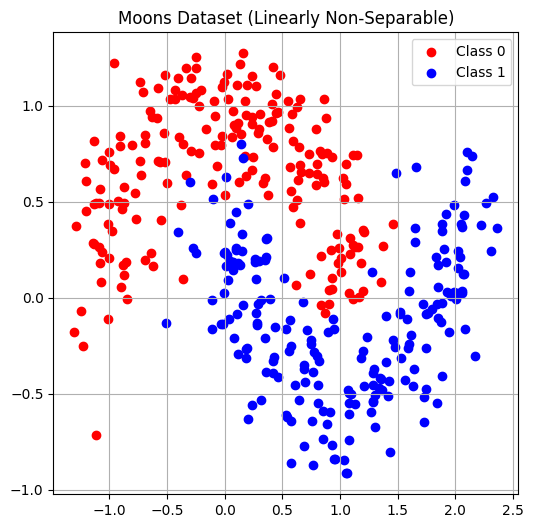

In [1]:
# 2D toy data, not linearly seperable
from sklearn.datasets import make_moons
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=400, noise=0.2, random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')
plt.title("Moons Dataset (Linearly Non-Separable)")
plt.legend()
plt.grid(True)
plt.show()

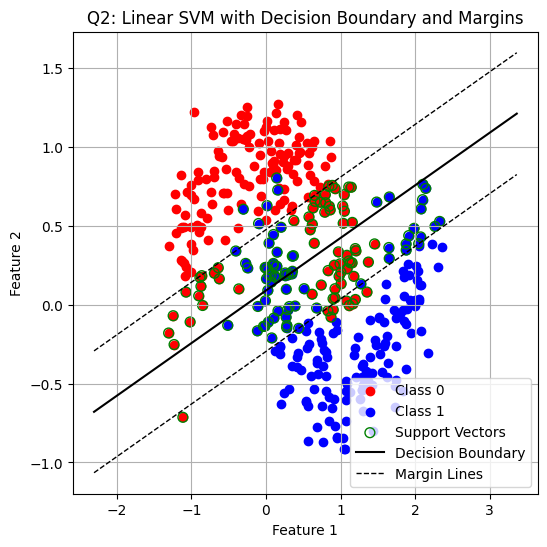

Linear SVM Accuracy: 0.84
Misclassified Points: 63
Number of Support Vectors: 138
Margin Width: 0.7320


In [2]:
# Linear SVM
linear_svm = SVC(kernel='linear', C=1) # As C increases, Margin lines get narrower
linear_svm.fit(X, y)
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]

# Margin : 2 / |w|
margin = 2 / np.linalg.norm(w)

# Decision boundary
xx = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 200) # finds the best line among 200
yy = -(w[0] * xx + b) / w[1]  # w0x + w1y + b = 0
yy_margin_up   = -(w[0] * xx + b - 1) / w[1]  # +1 margin, y = wx + b = 1
yy_margin_down = -(w[0] * xx + b + 1) / w[1]  # -1 margin, y = wx + b = -1

# Plot dataset
plt.figure(figsize=(6,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 1')
plt.scatter(linear_svm.support_vectors_[:,0], linear_svm.support_vectors_[:,1],
            s=50, facecolors='none', edgecolors='green', label='Support Vectors')



# Plot Decision boundary and Margin
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_margin_up, 'k--', linewidth=1, label='Margin Lines')
plt.plot(xx, yy_margin_down, 'k--', linewidth=1)

plt.title("Q2: Linear SVM with Decision Boundary and Margins")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Results
accuracy = linear_svm.score(X, y)
misclassified = np.sum(linear_svm.predict(X) != y)
print(f"Linear SVM Accuracy: {accuracy:.2f}")
print(f"Misclassified Points: {misclassified}")
print(f"Number of Support Vectors: {len(linear_svm.support_)}")
print(f"Margin Width: {margin:.4f}")

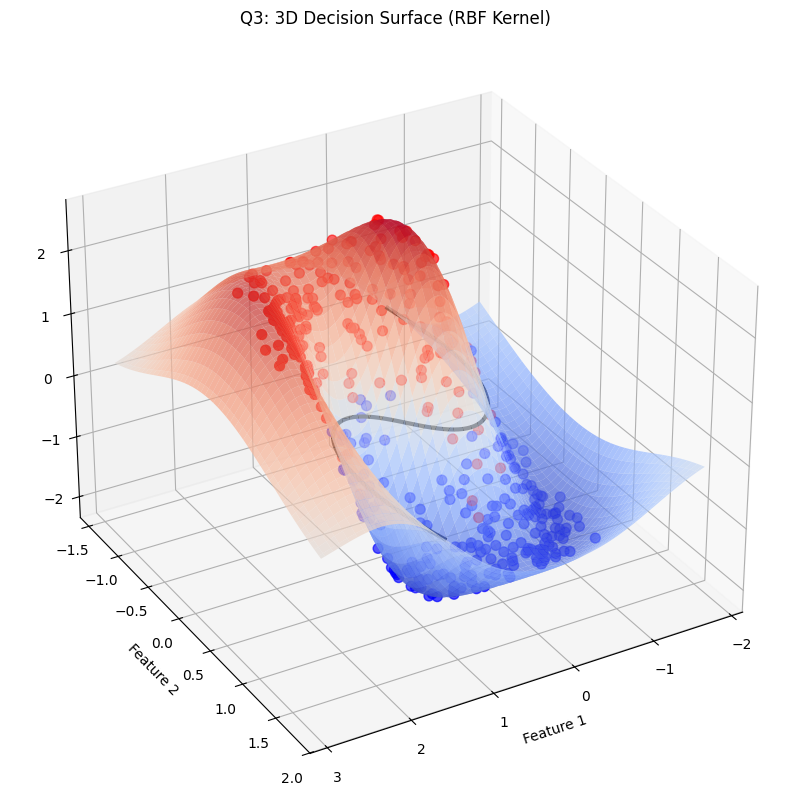

In [3]:
# Nonlinear SVM: RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X, y)

from mpl_toolkits.mplot3d import Axes3D

def plot_3d_decision_surface(model, X, y):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 60)

    x1_range = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 100)
    x2_range = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 100)
    xx, yy = np.meshgrid(x1_range, x2_range)
    zz = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.7)
    ax.contour(xx, yy, zz, levels=[0], colors='black', linewidths=3, linestyles='solid')
    ax.scatter(X[:,0], X[:,1], model.decision_function(X), c=y, cmap='bwr', s=50)
    ax.set_title("Q3: 3D Decision Surface (RBF Kernel)")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    plt.show()

plot_3d_decision_surface(rbf_svm, X, y)

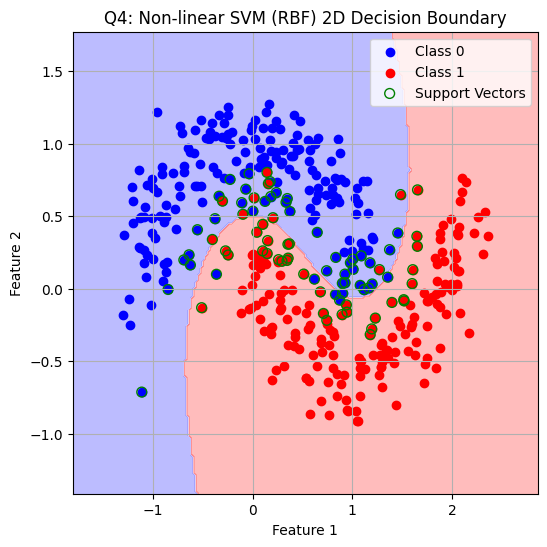

RBF SVM Accuracy: 0.965
Misclassified Points: 14
Number of Support Vectors: 84


In [4]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(6,6))
    x1_range = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200)
    x2_range = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200)
    xx, yy = np.meshgrid(x1_range, x2_range)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                s=50, facecolors='none', edgecolors='green', label='Support Vectors')
    plt.title("Q4: Non-linear SVM (RBF) 2D Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(rbf_svm, X, y)

accuracy = rbf_svm.score(X, y)
missclassified = np.sum(rbf_svm.predict(X) != y)

# Results
print("RBF SVM Accuracy:", accuracy)
print(f"Misclassified Points: {missclassified}")
print("Number of Support Vectors:", len(rbf_svm.support_))